# Housing Price Prediction

#### About dataset: 
    House prices increases every year, so there is need for a system to predict house prices in the future. House price prediction can help the developer to determine selling price of a house. In this dataset, to predict the housing price based on certain factors like house area, bedrooms, bedrooms, furnished, nearness to mainroad etc.
    
#### Objective: 
    Understand the dataset and cleanup(if required).
    Build regression models to predict the sales w.r.t. single and multiple feature.
    Evaluate the models and compare their respective scores like R2, RMSE etc.

#### Feature Meanings:
    1. Price: price of the house 
    2. Area: area of the house
    3. bedrooms: number of bedrooms
    4. bathrooms: number of bathrooms
    5. stories: level part of a building with a floor used by people i.e. floor number
    6. mairoad : is mainroad is connected or not
    7. guestroom: in house there is a guestroom or not
    8. basement: basement is there or not
    9. hotwaterheating: hotwaterheating system is present in house or not
    10. airconditioning: in house there is air conditioning facilities are availble or not
    11. parking: number of vehicles are parked
    12. prefarea: preferred area for the house
    13. furnishingstatus: house or flat is furnished or not

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 2. Load dataset

In [2]:
df = pd.read_csv('Housing.csv')

### 3. Exploratory Data Analysis

##### Knowing Initail Details about data

--- First of all we should know the how many rows and columns are present in the dataset:

In [3]:
df.shape

(545, 13)

There are 545 rows and 13 columns are present in the housing dataset.

--- Get some information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The info() method is giving information that there are 545 rows and 13 columns. The column numbers are starting from 0 to 12. Then column names along with number of non-null values in each column are displayed, also data types of each column are displayed.

--- Display only the column names

In [5]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Column names displayed in the form of array.

In [6]:
# Display in the form of list.
list(df.columns)

['price',
 'area',
 'bedrooms',
 'bathrooms',
 'stories',
 'mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'parking',
 'prefarea',
 'furnishingstatus']

--- To display first 5 rows from the dataset.

In [7]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


--- To display last 5 rows from the dataset.

In [8]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


##### Modifying and removing unwanted data:

Here all the columns are usefull and they have thier own contribution in the dataset.

--- Check any duplicates are present in the dataset

In [9]:
df.duplicated().sum()

0

In this dataset there is no any duplicates.

--- Check missing value

In [10]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

No any missing values

##### Getting statistical Inofrmation:

--- describe() method is used to get statistical data like percentile, mean and standard deviation of the numerical values in the columns.

In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


--- Get statistical dta of the categorical values in the columns

In [12]:
df.describe(include = 'O')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


--- Find relationship between numerical columns use corr() method

In [13]:
df.corr(method = 'pearson')

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


From the above table we observed that, all the numbers are positive so all the variables have positive relationship.

##### Data Visulization:

--- Draw pairplot to show the relationship between all numeric columns

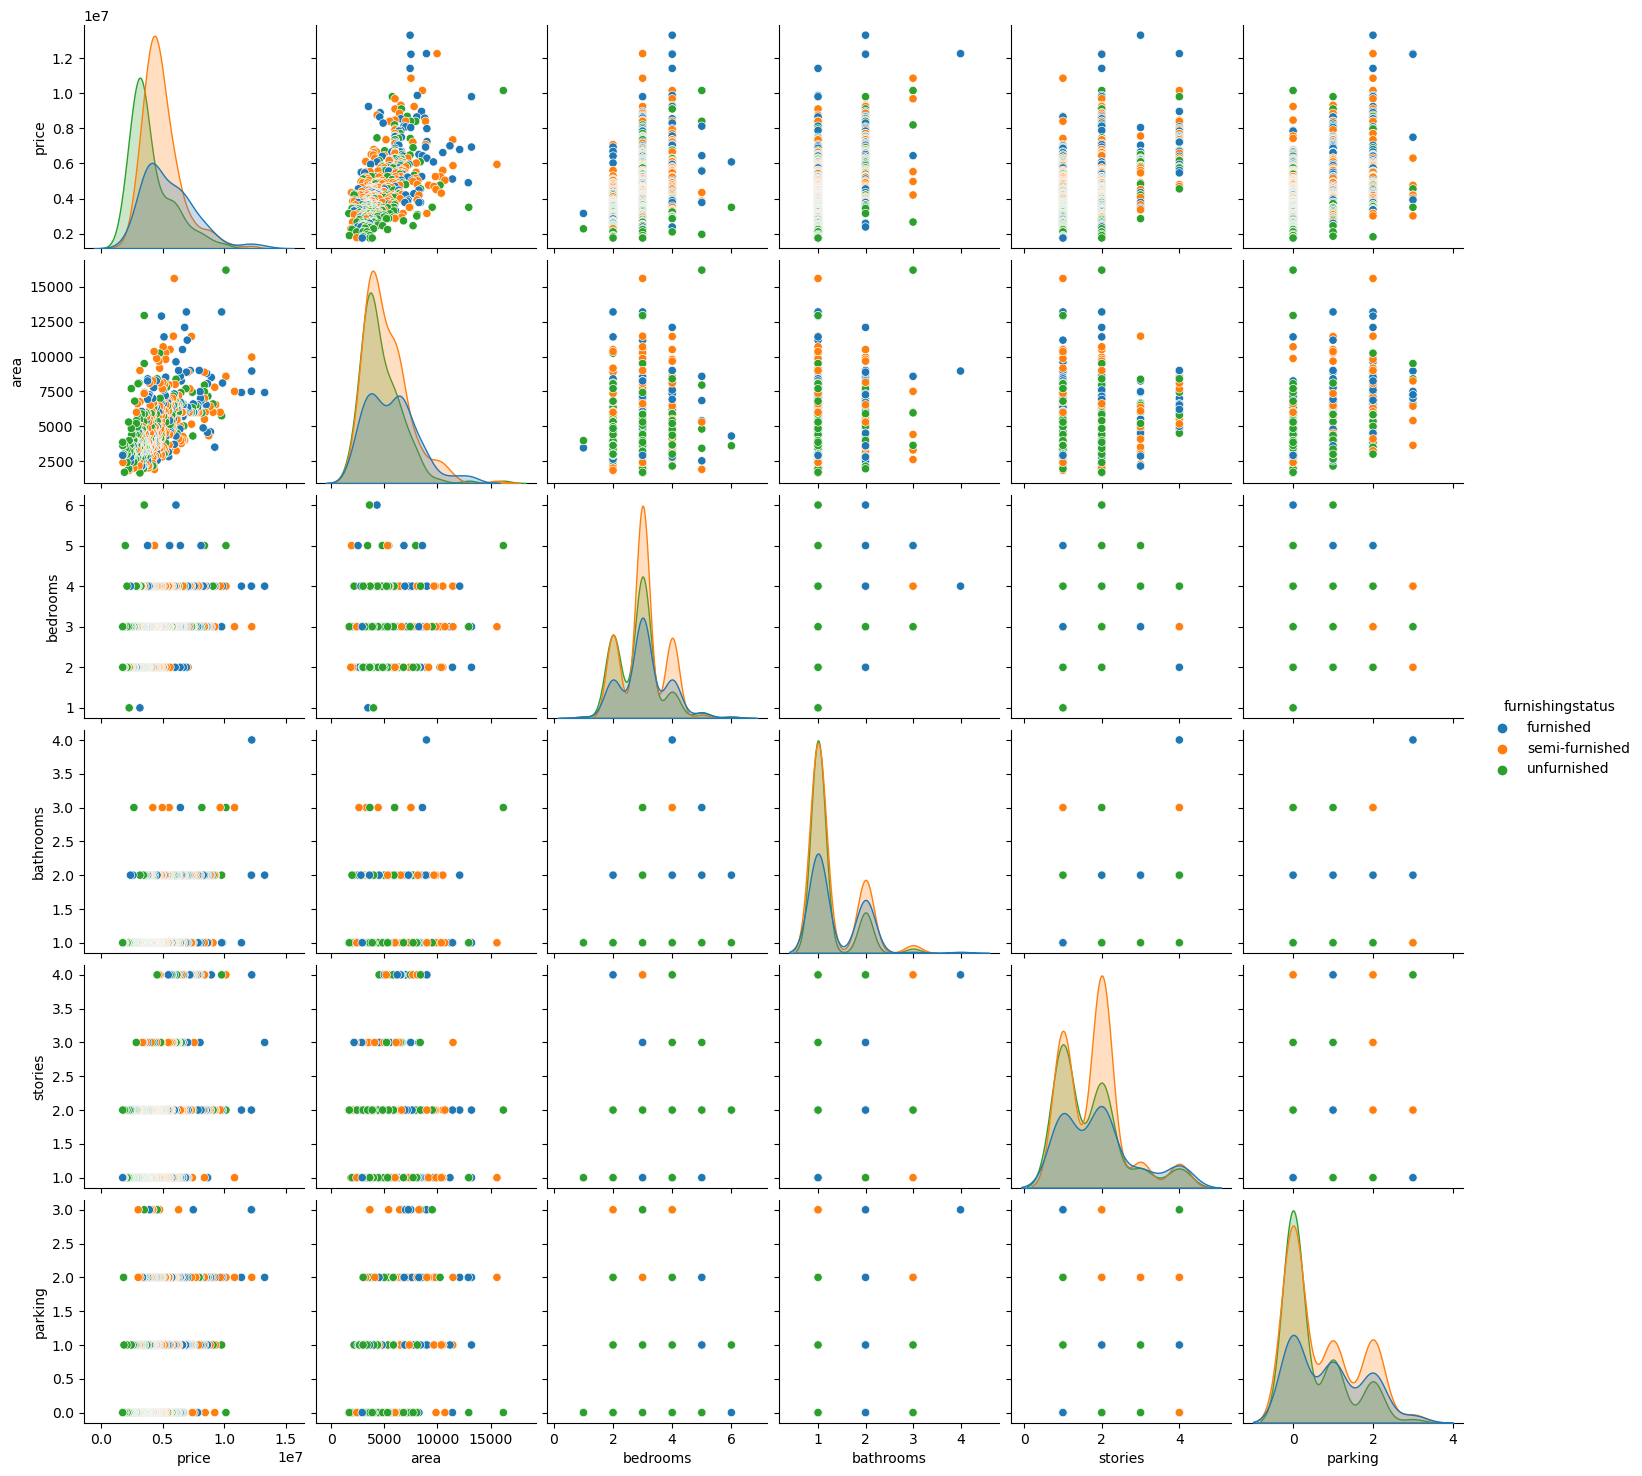

In [14]:
sns.pairplot(df, hue = 'furnishingstatus')

Here 'hue' should be mentioned on any categorical variable. The hue or color will change depending on the furnishing status.

--- Draw a distribution plot with kernel density estimate(kde) line, we use distplot() function

<Figure size 1200x600 with 0 Axes>

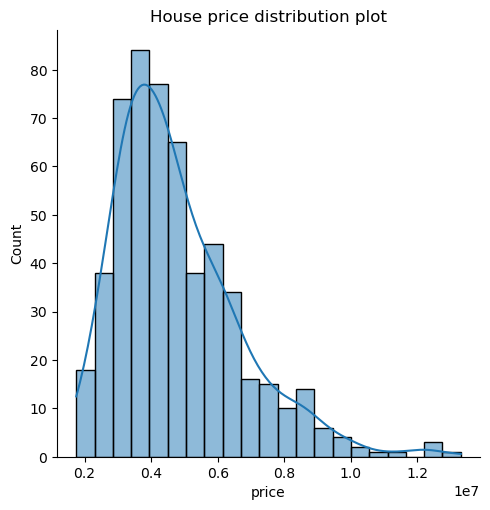

In [15]:

plt.figure(figsize = (12,6))
sns.displot(data = df, x = 'price', kde = True)
plt.title('House price distribution plot')
plt.show()

From the plot, we can understand that the highest number of house (around 75) are giving price 0.4 to 0.5 cr. A smaller number of flats are giving price 1.0 to 1.2 cr.

--- Draw feature distribution histogram plot

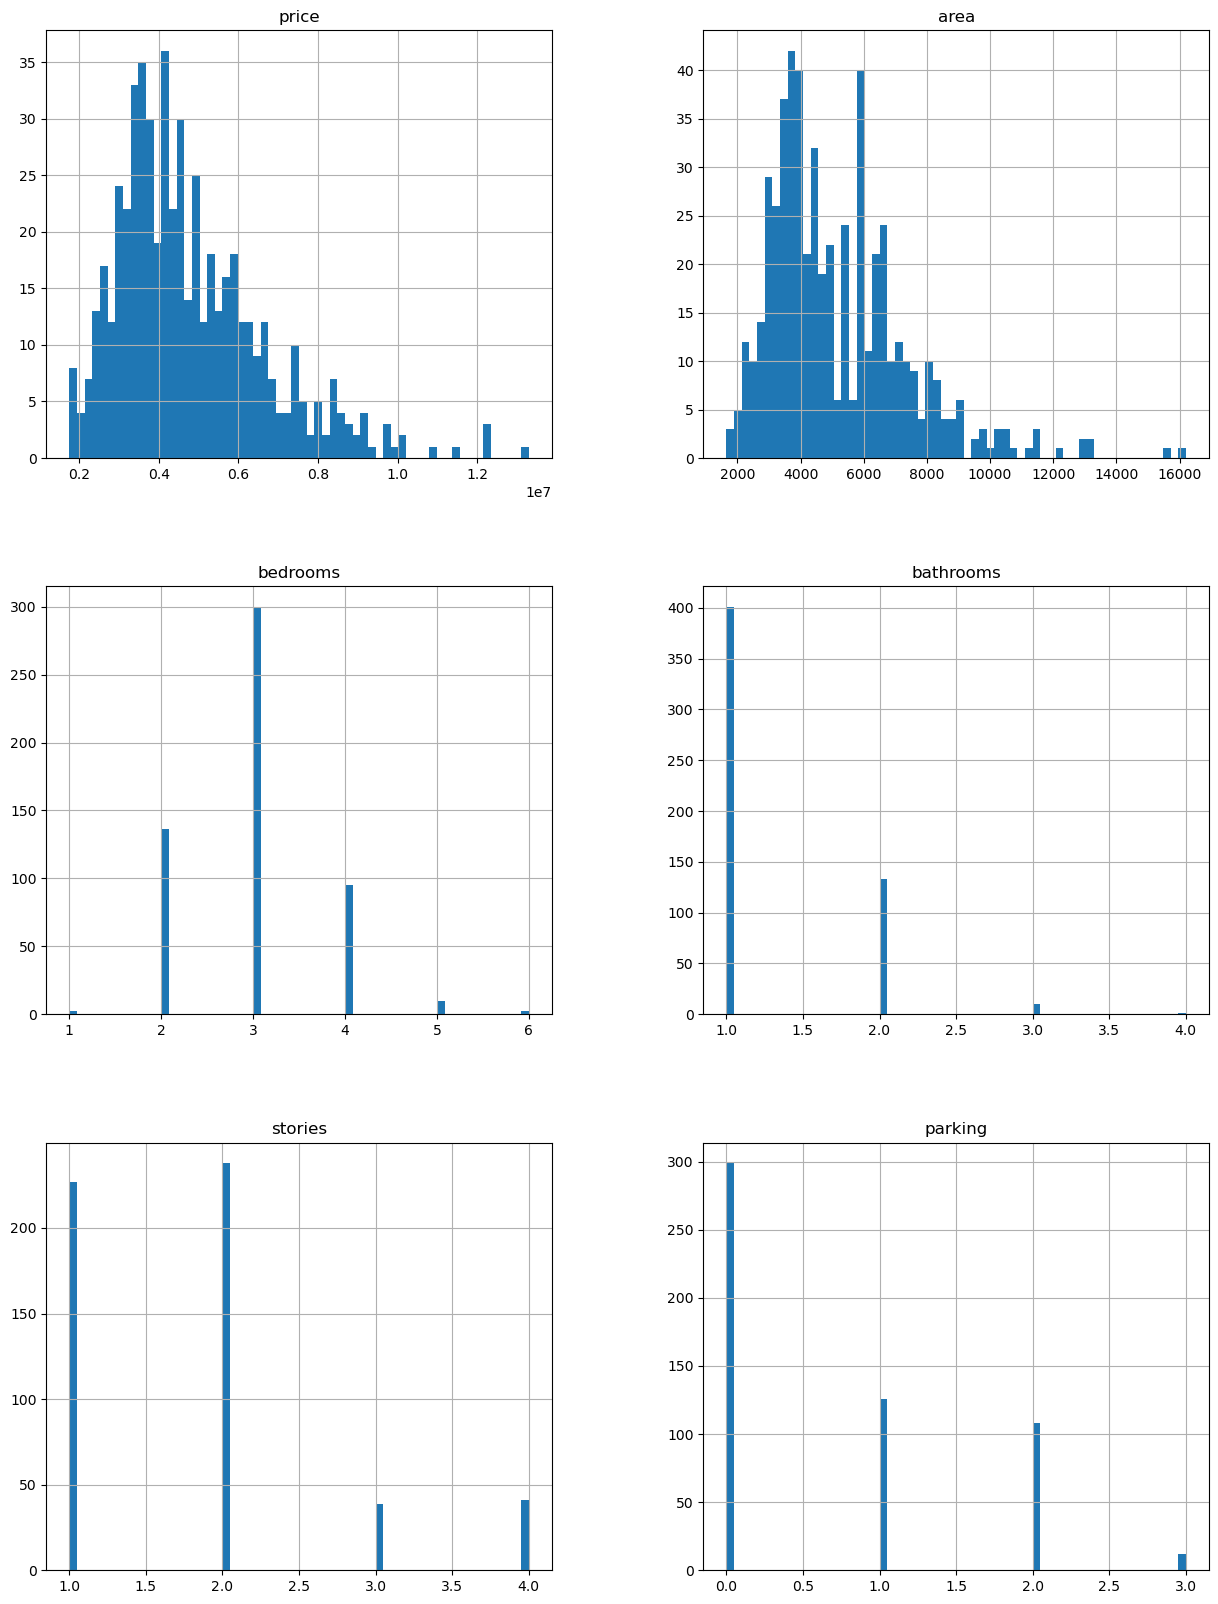

In [16]:

df.hist(figsize = (15,20), bins = 60)
plt.show()

#### Visulizing Categorical Data

--- draw bar graph for mainroad, guestroom, basement columns

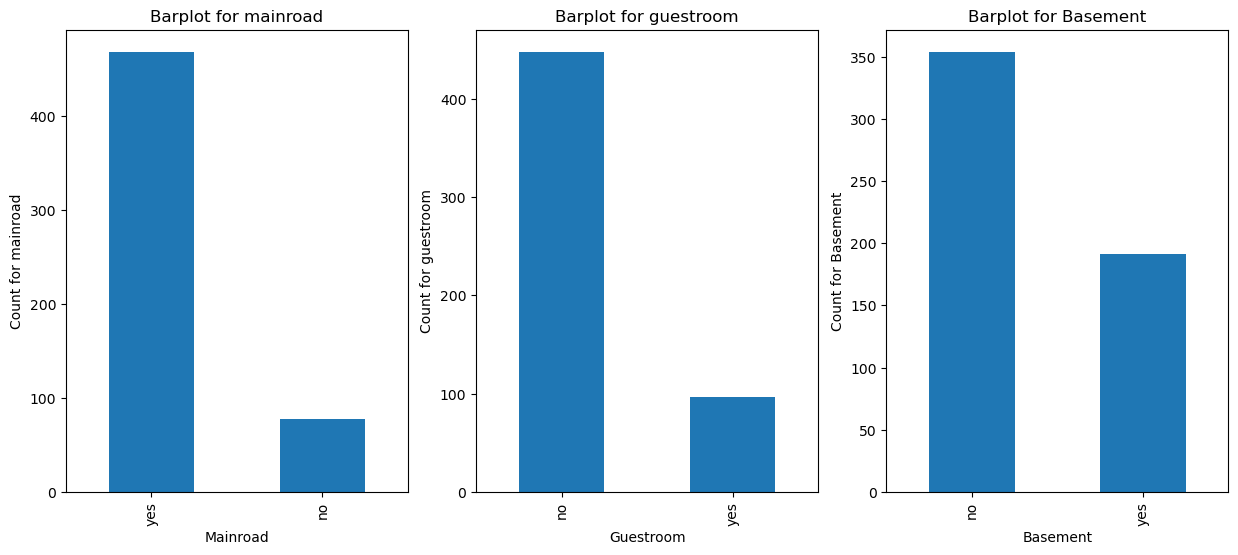

In [17]:
plt.figure(figsize = (15,6))

plt.subplot(1,3,1)
df['mainroad'].value_counts().plot(kind = 'bar')
plt.title('Barplot for mainroad')
plt.xlabel('Mainroad')
plt.ylabel('Count for mainroad')

plt.subplot(1,3,2)
df['guestroom'].value_counts().plot(kind = 'bar')
plt.title('Barplot for guestroom')
plt.xlabel('Guestroom')
plt.ylabel('Count for guestroom')

plt.subplot(1,3,3)
df['basement'].value_counts().plot(kind = 'bar')
plt.title('Barplot for Basement')
plt.xlabel('Basement')
plt.ylabel('Count for Basement')

plt.show()

From the above graph, we can see that more houses are connected to mainroad.
Too low houses are not having guestroom and also basement.


--- Draw a bar graph for hotwaterheating, airconditioning, furnishingstatus 

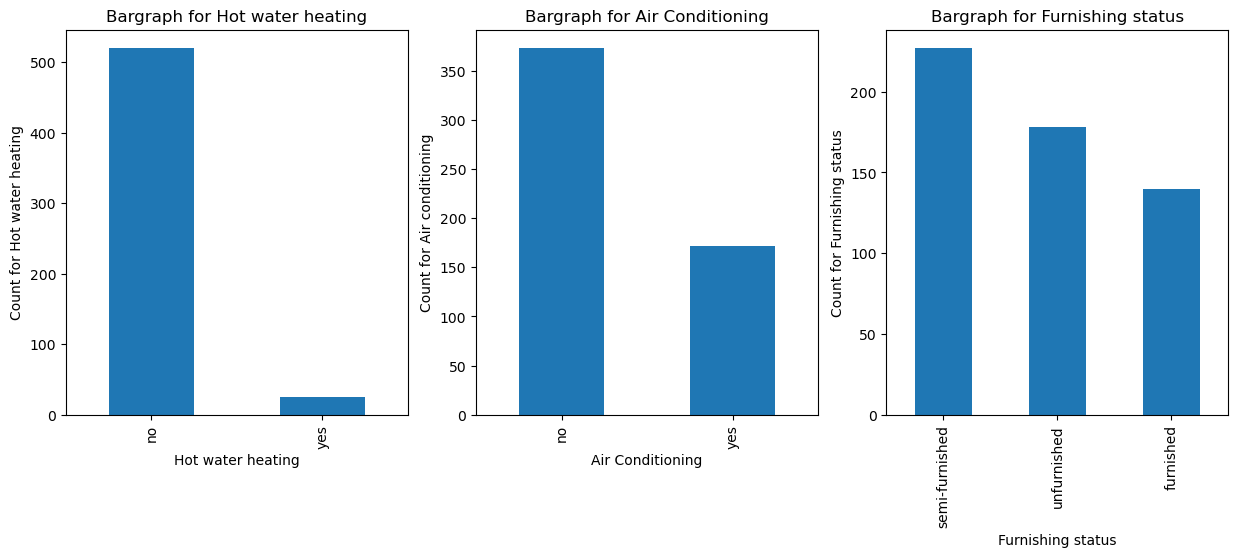

In [18]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
df['hotwaterheating'].value_counts().plot(kind='bar')
plt.title('Bargraph for Hot water heating')
plt.xlabel('Hot water heating')
plt.ylabel('Count for Hot water heating')

plt.subplot(1,3,2)
df['airconditioning'].value_counts().plot(kind = 'bar')
plt.title('Bargraph for Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count for Air conditioning')

plt.subplot(1,3,3)
df['furnishingstatus'].value_counts().plot(kind = 'bar')
plt.title('Bargraph for Furnishing status')
plt.xlabel('Furnishing status')
plt.ylabel('Count for Furnishing status')
plt.show()

From the above graph we can see that not all houses are having hot water heating system and sir conditioned system.
Higher count of houses are semi-furnished, and lower count of houses are furnished.

### Bivariate Analysis

---Draw boxplot for mainroad, guestroom w.r.t. price

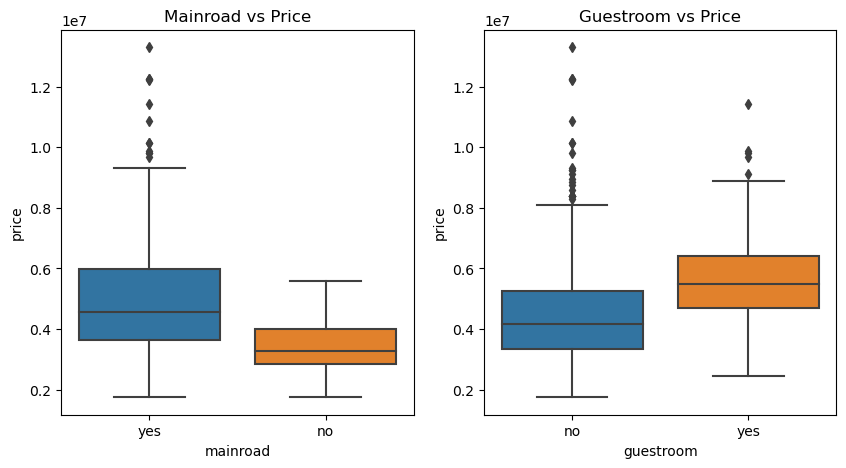

In [19]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title('Mainroad vs Price')
sns.boxplot(x = df.mainroad, y = df.price)

plt.subplot(1,2,2)
plt.title('Guestroom vs Price')
sns.boxplot(x = df.guestroom, y = df.price)

plt.show()

From the above box plots we can observed that, houses having mainroad and guestroom have correlation with price.

--- Draw  boxplot for basement and hotwaterheating w.r.t. price

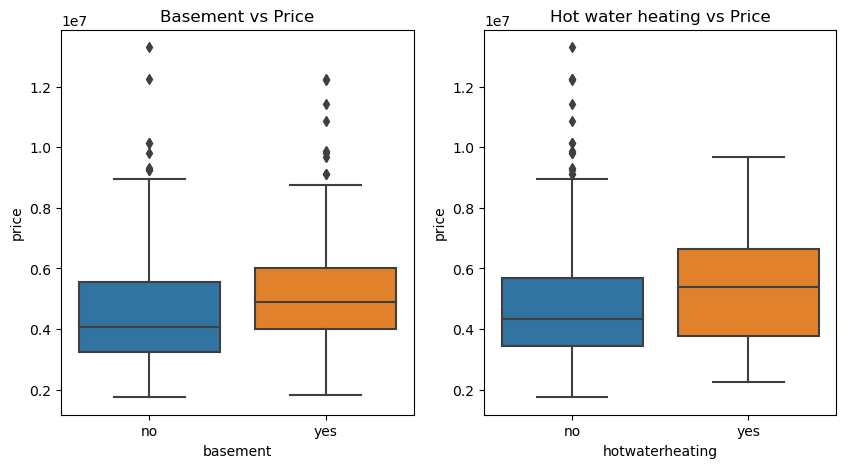

In [20]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
plt.title('Basement vs Price')
sns.boxplot(x = df.basement, y = df.price)

plt.subplot(1,2,2)
plt.title('Hot water heating vs Price')
sns.boxplot(x = df.hotwaterheating, y = df.price)

plt.show()

Houses having basement and hot water supply have slightly correlate with price of the house.

--- Draw boxplot for air conditioning, prefered area, furnishing status w.r.t. price

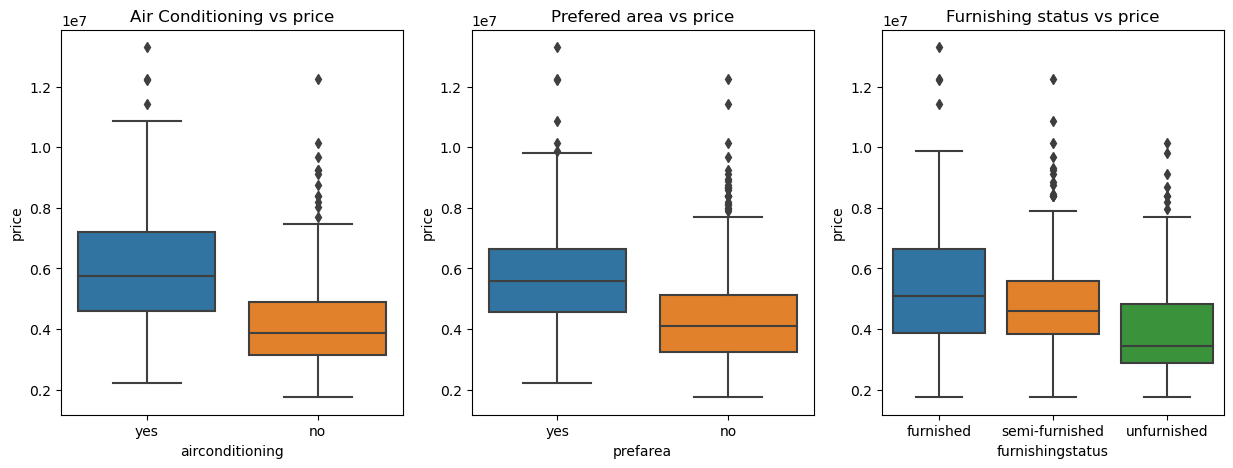

In [21]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.title('Air Conditioning vs price')
sns.boxplot(x = df.airconditioning, y = df.price)

plt.subplot(1,3,2)
plt.title('Prefered area vs price')
sns.boxplot(x = df.prefarea, y = df.price)

plt.subplot(1,3,3)
plt.title('Furnishing status vs price')
sns.boxplot(x = df.furnishingstatus, y = df.price)

plt.show()

From the above box plot we can see that, houses having airconditioning and prefered area have correlation with price of the house and furnished house have highest price.

In [22]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Data Preprocessing:
In this dataset, many columns with values 'yes' or 'no'.
But in order to fit a regression line, we would need numerical values, so we need to convert them to 0's and 1's where 1's: yes, 0's: No.

In [23]:
categorical_var_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# applying this function to the housing dataframe
df[categorical_var_list] = df[categorical_var_list].apply(binary_map)

In [24]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


##### furnishingstatus :
The furnishingstatus has 3 values furnished, semi-furnished, unfurnished, we need to convert these 3 values into integers values, here we use get_dummies()

In [25]:
# use get_dummies() to get dummies variable of furnishingstatus feature and store it into new varble status.
status = pd.get_dummies(df['furnishingstatus'])

In [26]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


we dont need 3 columns, so we drop the 'furnished' column 

In [27]:
# lets drop the first columns from status
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)

In [28]:
# now add the result to original dataset
df = pd.concat([df, status] , axis = 1)

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [30]:
# finally drop 'furnishingstatus' from original dataframe
df.drop(['furnishingstatus'], axis = 1, inplace = True)

In [31]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Splits dataset into training and testing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scaling

Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
# apply minmax scaler to all varibales except yes-no types varibales and dummy varibles
numerical_vars = ['area','price','bedrooms','bathrooms','stories', 'parking']


In [37]:
df_train[numerical_vars] = scaler.fit_transform(df_train[numerical_vars])

In [38]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [39]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


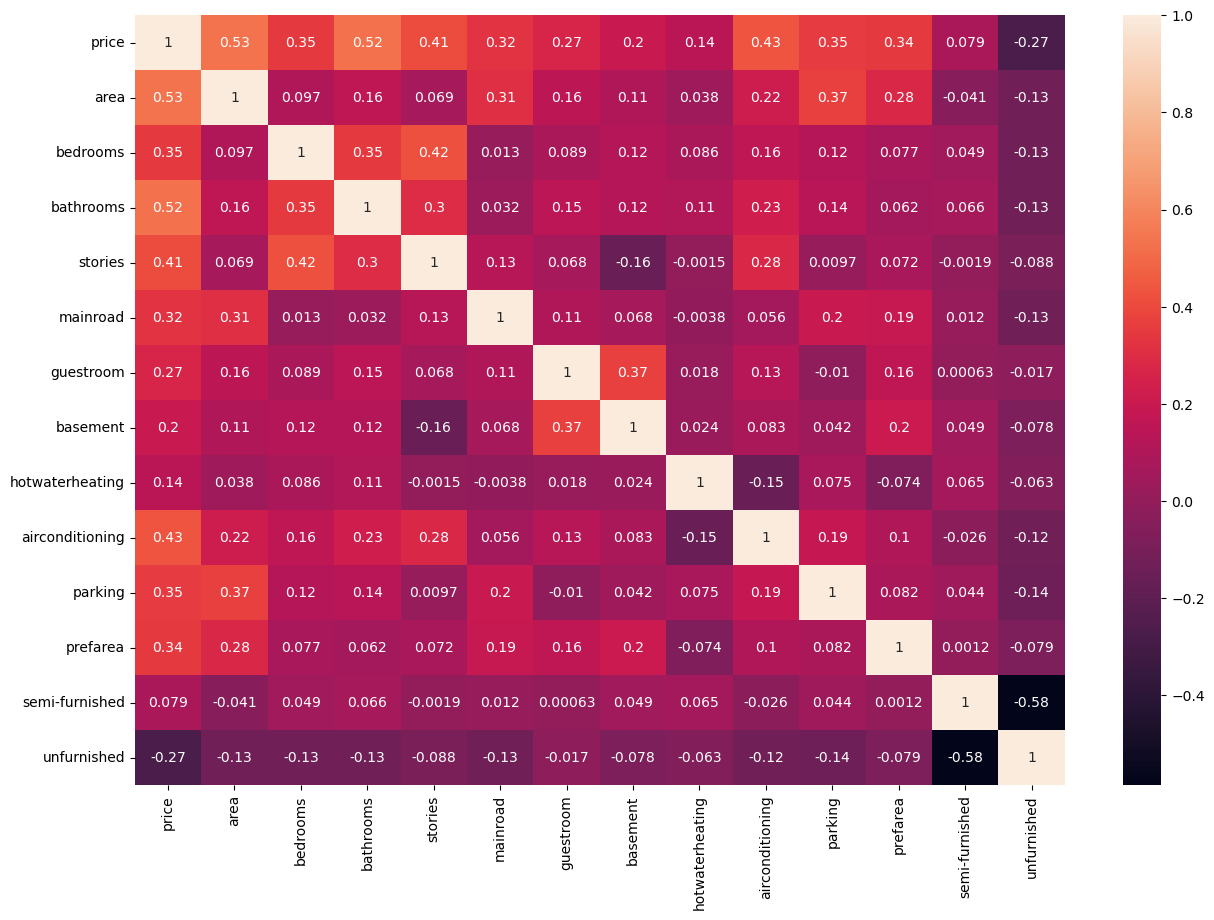

In [40]:
# check the correlation coefficient 
plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

From the above plot we observed that, area coorelates to price to the most.
Lets see pair plot for area vs price

### Model Building:
This time we will use LinearRegression function from Scikit Learn

In [41]:
# Dividing X, y for model building
X = df.drop(['price'], axis = 1)
y = df['price']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2 , random_state=2)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr = LinearRegression()

In [45]:
lr.fit(x_train, y_train)

LinearRegression()

In [46]:
y_lr_predict = lr.predict(x_test)

In [49]:
# Evaluation for Linear Regression
from sklearn import metrics
from sklearn.metrics import r2_score,accuracy_score

In [48]:
score = r2_score(y_test, y_lr_predict)
score

0.6298518608872239

The accuracy score of linear regression model is 63%